
=== EDA for /home/ubuntu/Desktop/JY/ddrm/ultrasound/datasets_v0.03/P0 ===
Total images: 180

Sample of parsed attributes:
                filename cylinder object position  angle  view_depth probe serial
CN_ON_PL_D315_V4_000.bmp       CN     ON   tilted 315deg           4     0     00
  CN_ON_PC_DC_V3_000.bmp       CN     ON   center   Cdeg           3     0     00
CN_ON_PL_D315_V3_001.bmp       CN     ON   tilted 315deg           3     0     01
  CN_ON_PC_DC_V3_001.bmp       CN     ON   center   Cdeg           3     0     01
CN_ON_PL_D315_V4_001.bmp       CN     ON   tilted 315deg           4     0     01

Counts table for cylinder:
cylinder  count
      CN     90
      CY     90


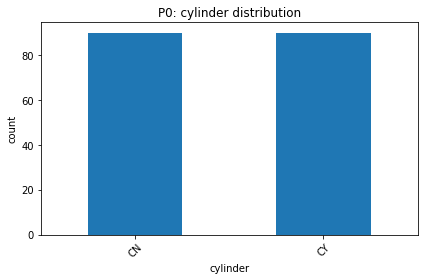


Counts table for object:
object  count
    ON    100
    OY     80


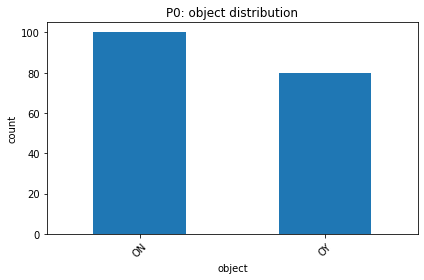


Counts table for position:
position  count
  center     60
  tilted    120


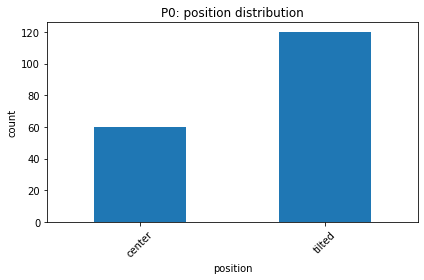


Counts table for angle:
 angle  count
000deg     40
045deg     40
270deg     40
315deg     40
  Cdeg     20


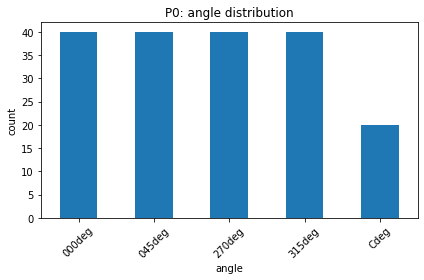


Counts table for view_depth:
 view_depth  count
          3     36
          4     36
          5     36
          6     36
          7     36


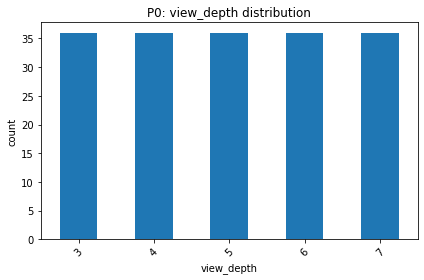


Counts table for probe:
probe  count
    0    180


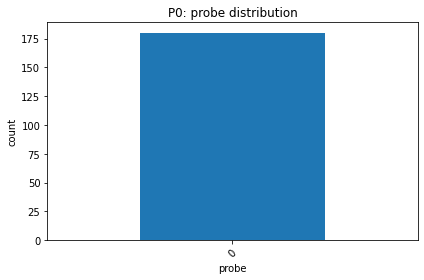


=== EDA for /home/ubuntu/Desktop/JY/ddrm/ultrasound/datasets_v0.03/P2 ===
Total images: 180

Sample of parsed attributes:
                filename cylinder object position  angle  view_depth probe serial
CN_ON_PL_D315_V4_200.bmp       CN     ON   tilted 315deg           4     2     00
  CN_ON_PC_DC_V3_200.bmp       CN     ON   center   Cdeg           3     2     00
CN_ON_PL_D315_V3_201.bmp       CN     ON   tilted 315deg           3     2     01
  CN_ON_PC_DC_V3_201.bmp       CN     ON   center   Cdeg           3     2     01
CN_ON_PL_D315_V4_201.bmp       CN     ON   tilted 315deg           4     2     01

Counts table for cylinder:
cylinder  count
      CN     90
      CY     90


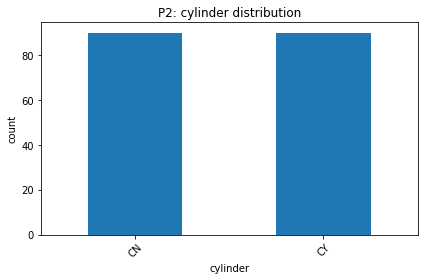


Counts table for object:
object  count
    ON    100
    OY     80


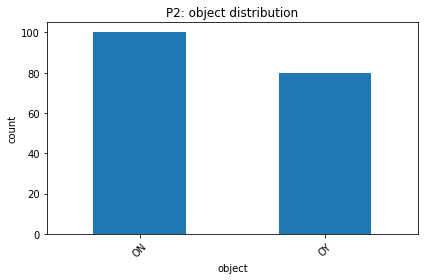


Counts table for position:
position  count
  center    100
  tilted     80


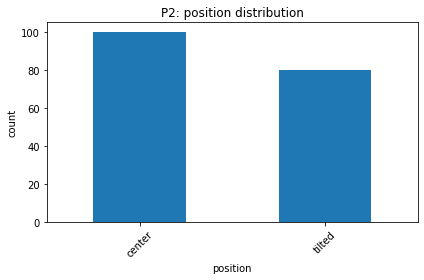


Counts table for angle:
 angle  count
000deg     40
045deg     40
270deg     40
315deg     40
  Cdeg     20


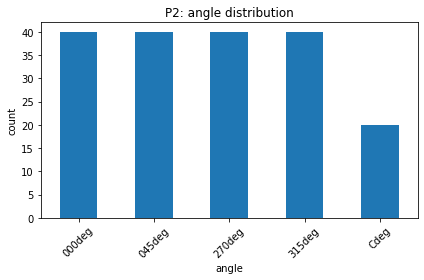


Counts table for view_depth:
 view_depth  count
          3     36
          4     36
          5     36
          6     36
          7     36


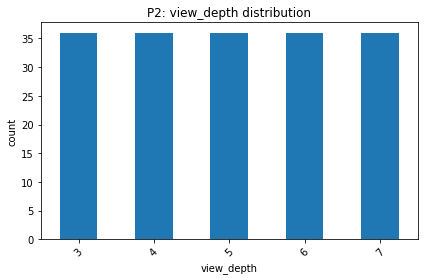


Counts table for probe:
probe  count
    1     90
    2     90


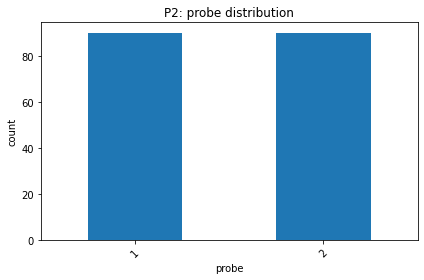

Combined EDA summary saved to /home/ubuntu/Desktop/JY/ddrm/ultrasound/datasets_v0.03/eda_summary.csv


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


def parse_filename(filename):
    """
    Parse attributes from filename, e.g., CY_OY_PC_DXXX_V7_000.bmp
    Returns dict with keys: filename, cylinder, object, position, angle, view_depth, probe, serial
    """
    name = os.path.splitext(filename)[0]
    parts = name.split('_')
    return {
        'filename': filename,
        'cylinder': 'CY' if parts[0]=='CY' else 'CN',
        'object': 'OY' if parts[1]=='OY' else 'ON',
        'position': 'center' if parts[2]=='PC' else 'tilted',
        'angle': 'none' if parts[3]=='DXXX' else parts[3][1:]+'deg' if parts[3].startswith('D') else parts[3],
        'view_depth': int(parts[4][1:]),
        'probe': parts[5][0],
        'serial': parts[5][1:]
    }


def eda_on_dir(base_dir, show_plots=True):
    """
    Perform EDA on image files in base_dir. Parses filenames,
    prints counts as tables and plots distributions.
    Returns DataFrame of parsed attributes.
    """
    # List BMP files
    files = [f for f in os.listdir(base_dir) if f.lower().endswith('.bmp')]
    # Parse attributes into DataFrame
    df = pd.DataFrame([parse_filename(f) for f in files])

    print(f"\n=== EDA for {base_dir} ===")
    print(f"Total images: {len(df)}")

    # Display raw table of first few rows
    print("\nSample of parsed attributes:")
    print(df.head().to_string(index=False))

    # Categorical distributions
    for col in ['cylinder', 'object', 'position', 'angle', 'view_depth', 'probe']:
        counts = df[col].value_counts().sort_index()
        table = counts.rename_axis(col).reset_index(name='count')
        print(f"\nCounts table for {col}:")
        print(table.to_string(index=False))
        if show_plots:
            plt.figure(figsize=(6,4))
            # bar plot
            counts.plot(kind='bar')
            plt.title(f"{os.path.basename(base_dir)}: {col} distribution")
            plt.xlabel(col)
            plt.ylabel('count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    return df


if __name__ == '__main__':
    # Base directories
    base = '/home/ubuntu/Desktop/JY/ddrm/ultrasound/datasets_v0.03'
    p0_dir = os.path.join(base, 'P0')
    p2_dir = os.path.join(base, 'P2')

    # Run EDA
    df0 = eda_on_dir(p0_dir)
    df2 = eda_on_dir(p2_dir)

    # Save combined summary
    summary_csv = os.path.join(base, 'eda_summary.csv')
    pd.concat([df0.assign(set='P0'), df2.assign(set='P2')], ignore_index=True).to_csv(summary_csv, index=False)
    print(f"Combined EDA summary saved to {summary_csv}")
